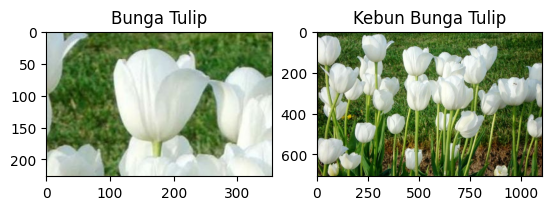

In [6]:
# Latihan 7. Menghitung deteksi strawberry dengan template matching
# tampilkan kedua gambar
from matplotlib import pyplot as plt
import cv2

# panggil dan konversi warna agar sesuai dengan Matplotlib
kebun_tulip = cv2.imread('kebun tulip.jpeg')
kebun_tulip = cv2.cvtColor(kebun_tulip, cv2.COLOR_BGR2RGB)

# panggil dan konversi warna agar sesuai dengan Matplotlib
tulip = cv2.imread('tulip.JPG')
tulip = cv2.cvtColor(tulip, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(kebun_tulip), plt.title('Bunga Tulip')
plt.subplot(122),plt.imshow(tulip), plt.title('Kebun Bunga Tulip')
plt.show()



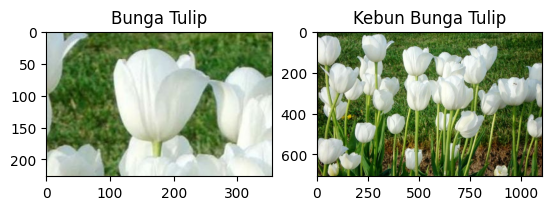

Jumlah objek ditemukan: 23


In [8]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
# panggil dan konversi warna agar sesuai dengan Matplotlib
tulip = cv2.imread('tulip.JPG')
tulip = cv2.cvtColor(tulip, cv2.COLOR_BGR2RGB)
# panggil dan konversi warna agar sesuai dengan Matplotlib
kebun_tulip = cv2.imread('kebun tulip.jpeg')
kebun_tulip = cv2.cvtColor(kebun_tulip, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(kebun_tulip), plt.title('Bunga Tulip')
plt.subplot(122),plt.imshow(tulip), plt.title('Kebun Bunga Tulip')
plt.show()

## membaca gambar utuh untuk dicari
img_rgb = cv2.imread('tulip.JPG')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

## membaca template
template = cv2.imread('kebun tulip.jpeg', 0)

## ukuran template. ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]

# menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Nilai threshold atau ambang batas deteksi kemiripan titik.
# Lakukan eksperimen dengan merubah nilai ini
threshold = 0.15
loc = np.where(res >= threshold)

## membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint = []
lspoint2 = []
count = 0 # untuk menyimpan jumlah matching yang ditemukan

for pt in zip(*loc[::-1]):
    ## jika sudah ada, skip lokasi tersebut
    if pt[0] not in lspoint and pt[1] not in lspoint2:
        ## gambar persegi warna kuning dengan ketebalan dua poin
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
        for i in range(((pt[0])-9), ((pt[0])+9), 1):
            ## tambahkan koordinat x ke list
            lspoint.append(i)
        for k in range(((pt[1])-9), ((pt[1])+9), 1):
            ## tambahkan koordinat y ke list
            lspoint2.append(k)
        count += 1 ### berapa jumlah matching yang ditemukan?
    else:
        continue

print("Jumlah objek ditemukan:", count)

## tampilkan dengan imshow
cv2.imshow('Detected Objects', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()